In [40]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [41]:
from train import split_X_y,split_train_test, create_task_dataset

In [42]:
df = pd.read_csv("data/preprocessed/prep_nan.csv", index_col=0)

C:\Users\benja\AppData\Local\Temp\ipykernel_33380\144160135.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/preprocessed/prep_nan.csv", index_col=0)


In [45]:
df['incident_area'].isna().sum()

12

In [20]:
cat_features = [
        "cause_id",
        "month",
        "year",
        "STATUS",
    ]
num_features = ["report_number", "incident_area", "previous_diff_incident_area"]
target = "diff_incident_area"

<Axes: xlabel='previous_diff_incident_area', ylabel='diff_incident_area'>

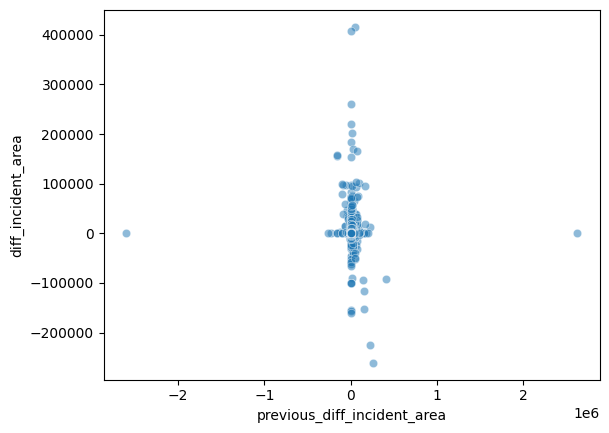

In [30]:
import seaborn as sns
sns.scatterplot(df, x='previous_diff_incident_area', y='diff_incident_area', alpha=0.5)

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])


X, y = split_X_y(df, id_cols, target)
clf.fit(X, y)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [48]:
df = pd.read_csv("data/preprocessed/dataset_1130.csv")

C:\Users\benja\AppData\Local\Temp\ipykernel_33380\4101318396.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/preprocessed/dataset_1130.csv")


In [83]:
features = ["report_number", "incident_area", "previous_diff_incident_area", "cause_id", "month", "year", "STATUS"]
target = "diff_incident_area"
id_cols = ["report_id", "fire_id"]

In [84]:
df.columns.intersection(features)

Index(['cause_id', 'STATUS', 'year', 'month', 'report_number', 'prev_area',
       'prev_date_diff', 'next_date_diff', 'prev_derivate'],
      dtype='object')

In [ ]:
df['prev_derivate']

In [80]:
task_df, encoder = create_task_dataset(df, id_cols, features, target)
non_id_cols = [col for col in task_df.columns if col not in id_cols]
print(len(task_df))
task_df = task_df.dropna()
print(f"After dropna: {len(task_df)}")
# split
train_df, test_df = split_train_test(
    task_df,
    test_size=0.2,
    group_id="fire_id",
    random_state=42,
    save_datasets=False,
)

Identified 4 categorical columns: 
['cause_id', 'month', 'year', 'STATUS']

You should check these columns: 
[]
37471
After dropna: 31656


In [81]:
def compute_baselines_scores(train_df, test_df, target):
  y_train_true = train_df[target]
  y_train_pred = np.zeros(len(train_df))
  train_rmse = mean_squared_error(y_train_true, y_train_pred, squared=False)
  train_mae = mean_absolute_error(y_train_true, y_train_pred)
  y_test_true = test_df[target]
  y_test_pred = np.zeros(len(test_df))
  test_rmse = mean_squared_error(y_test_true, y_test_pred, squared=False)
  test_mae = mean_absolute_error(y_test_true, y_test_pred)
  return train_rmse, train_mae, test_rmse, test_mae
compute_baselines_scores(train_df, test_df, target)

c:\ProgramData\Anaconda3\envs\wildfirepy38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains infinity or a value too large for dtype('float64').

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
X_train, y_train = split_X_y(train_df, id_cols, target)
X_test, y_test = split_X_y(test_df, id_cols, target)
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Train scores: RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False)}, MAE: {mean_absolute_error(y_train, model.predict(X_train))}")
print(f"Test scores: RMSE: {mean_squared_error(y_test, y_pred, squared=False)}, MAE: {mean_absolute_error(y_test, y_pred)}")

c:\ProgramData\Anaconda3\envs\wildfirepy38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [69]:
import matplotlib.pyplot as plt

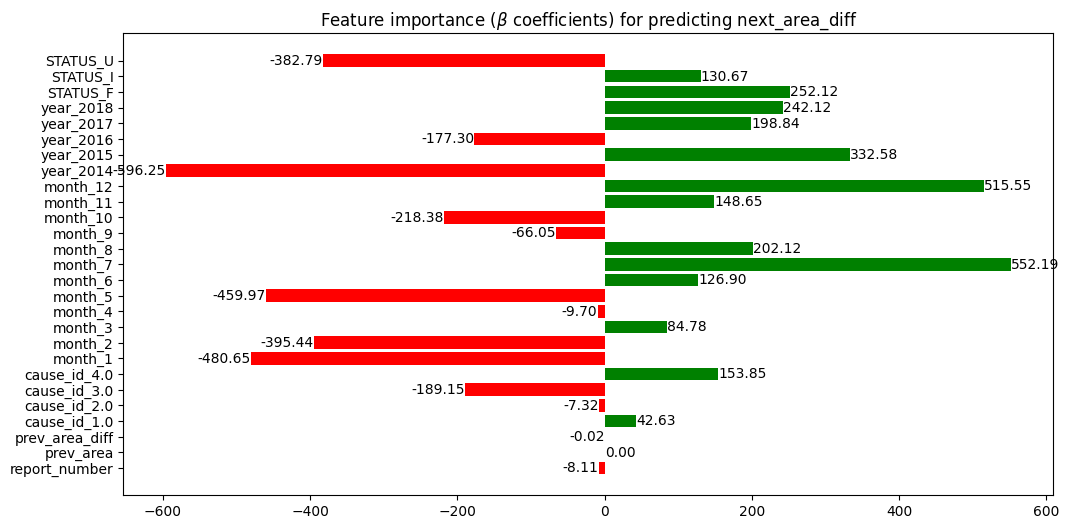

In [72]:
plt.figure(figsize=(12, 6))

colors = ["green" if c > 0 else "red" for c in model.coef_]
bars = plt.barh(X_test.columns, model.coef_, color=colors)

# Annotate the bars with their values
for bar in bars:
    width = bar.get_width()
    label_x_pos = width if width > 0 else width - 0.1
    plt.text(
        label_x_pos,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.2f}",
        va="center",
        ha="right" if width < 0 else "left",
    )
plt.title(rf"Feature importance ($\beta$ coefficients) for predicting {target}")
plt.show()

In [59]:
num_features = [['incident_area', 'prev_area', 'prev_area_diff']]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# fit pipeline
pipeline.fit(train_df[num_features], train_df[target])


In [10]:
compute_baselines_scores(train_df, target)
compute_baselines_scores(test_df, target)

(7147.0811306958985, 841.6926695356286)

In [11]:
from sklearn.linear_model import LinearRegression



LinearRegression()

4501.855612920328


1098.7453200474422

In [15]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=10)
model.fit(X_train, y_train)

c:\ProgramData\Anaconda3\envs\wildfirepy38\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.28984e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=10)

In [16]:
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred, squared=False))
mean_absolute_error(y_test, y_pred)

4501.939300377709


1098.2247448150692